In [2]:
#dependancies 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle
import requests
import json

In [3]:
# Reading the csv file into a pandas DataFrame

csvdata = pd.read_csv('Resources/water_potability.csv')
csvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# Statistical summary 
csvdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369481,32.879680,47.430000,176.847500,196.965000,216.670000,323.120000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


<AxesSubplot:>

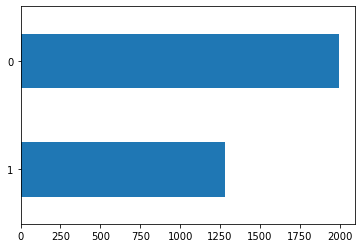

In [5]:
#Potability data

csvdata.Potability.value_counts().sort_values().plot(kind = 'barh')

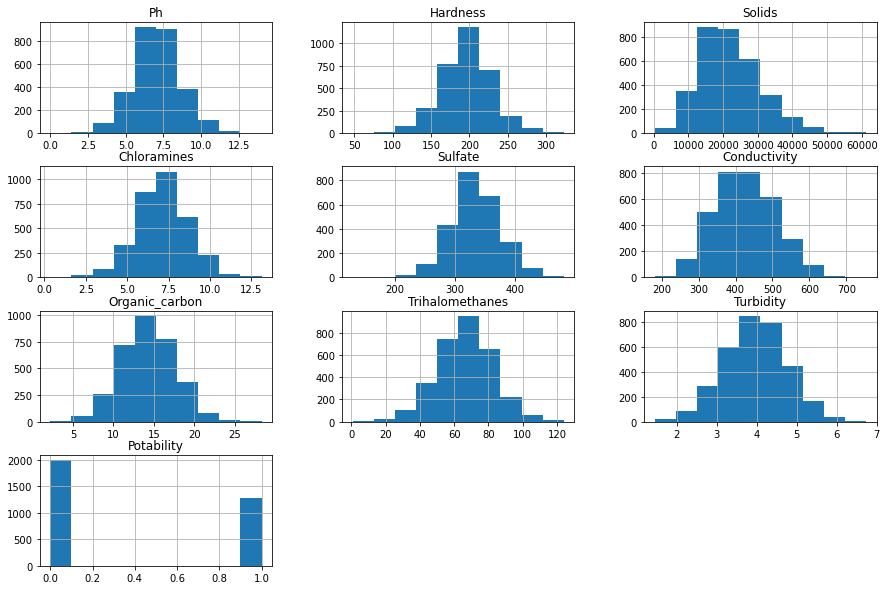

<Figure size 432x288 with 0 Axes>

In [6]:
#frequency distributtion 

csvdata.hist(figsize=(15,10))
plt.figure()
plt.show()

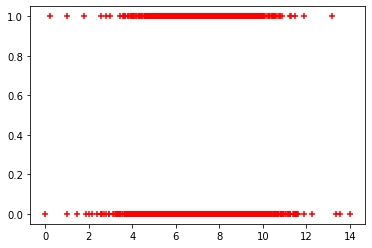

In [7]:
plt.scatter(csvdata.Ph,csvdata.Potability,marker='+',color='red')

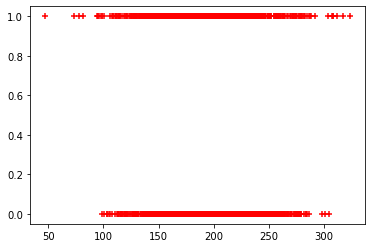

In [8]:
plt.scatter(csvdata.Hardness,csvdata.Potability,marker='+',color='red')

In [9]:

data = csvdata.isnull().sum()
data

Ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
data2 = csvdata.fillna(csvdata.mean())
data2

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.89,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.42,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.24,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.37,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.10,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.68,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.55,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.76,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.60,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [11]:
data3 = data2.isnull().sum()
data3

Ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [13]:
# Assign X (data) and y (target)
X = data2.drop("Potability", axis=1)
y = data2["Potability"]
print(X.shape, y.shape)

(3276, 9) (3276,)


In [14]:
columns = X.columns

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std = scaler.fit(X_train)

X_train = std.transform(X_train)
X_test = std.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
X_train.head()

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.008579,0.208780,-1.291568,-0.179482,-0.001376,-0.524834,0.518854,0.407166,-1.159647
1,-0.698082,-0.992442,-1.370714,0.387127,0.467997,-0.646340,0.716149,-0.059941,-0.063939
2,0.008579,-1.576033,-0.660670,-0.981449,1.275328,-0.649459,-0.950311,0.367814,1.188546
3,0.204898,1.229374,-0.346270,0.185113,0.721593,-0.866083,1.122043,-0.520867,-0.651370
4,0.008579,-1.039055,0.292342,0.098407,-0.080720,-0.152331,-0.810614,0.472749,-0.968275


In [17]:
X_test

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.860863,-0.458225,-1.021673,-0.637000,1.120390,-0.265539,0.447546,-1.974572,0.128470
1,-0.149430,-0.937548,-1.809150,-0.620930,1.088575,0.196405,-0.950281,-0.155979,0.361736
2,0.008579,-0.450865,0.646850,0.302592,-0.984022,-0.115388,-1.697310,0.407909,-0.211905
3,-0.372219,-0.403638,-0.879575,0.808915,1.085389,0.848767,-0.794064,-0.496120,-0.896051
4,-1.064684,-1.420245,2.391380,-0.343149,-0.312603,-1.730997,-0.916583,0.338054,-0.390338
...,...,...,...,...,...,...,...,...,...
651,0.008579,-0.510052,0.412309,0.110912,-0.001376,-1.435913,-1.214465,-1.547510,-2.955621
652,-0.797683,1.314935,-0.173356,-0.483181,0.205402,-0.289085,1.405285,-0.167470,0.532460
653,0.008579,-1.267524,-0.169897,0.681095,-0.001376,-1.695115,0.702281,-0.435241,0.148267
654,-0.390689,-0.721653,-0.841004,0.395531,0.430620,2.796242,-1.222335,-0.604637,0.886350


In [23]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20,penalty='l2')
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with standardized features: {:.2f}'.format(lr_std.score(X_test, y_test)))

Accuracy of logistic regression on test set with standardized features: 0.61


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [25]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm = norm.fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
X_train.head()

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.505771,0.565019,0.169478,0.515672,0.581699,0.355182,0.529170,0.605016,0.305523
1,0.431416,0.422939,0.157992,0.586879,0.629935,0.338040,0.554347,0.543244,0.467719
2,0.505771,0.353912,0.261033,0.414888,0.712901,0.337600,0.341689,0.599812,0.653123
3,0.526428,0.685734,0.306658,0.561491,0.655996,0.307038,0.606143,0.482289,0.380762
4,0.505771,0.417425,0.399333,0.550595,0.573545,0.407735,0.359515,0.613689,0.333851


In [26]:
X_test.head()

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.414288,0.486126,0.208644,0.458175,0.696978,0.391764,0.520070,0.290046,0.496201
1,0.489145,0.429432,0.094367,0.460195,0.693709,0.456935,0.341692,0.530543,0.530731
2,0.505771,0.486996,0.450779,0.576255,0.480716,0.412947,0.246364,0.605114,0.445816
3,0.465703,0.492582,0.229266,0.639885,0.693382,0.548971,0.361627,0.485562,0.344543
4,0.392842,0.372338,0.703943,0.495104,0.549715,0.185015,0.345993,0.595876,0.419403


In [28]:
#Building Logistic Regression model on the Standardized variables

from sklearn.linear_model import LogisticRegression
lr_std = LogisticRegression(random_state = 20)
lr_std.fit(X_train, y_train)
y_pred = lr_std.predict(X_test)
print('Accuracy of logistic regression on test set with normalized features: {:.2f}'.format(lr_std.score(X_test, y_test)))


Accuracy of logistic regression on test set with normalized features: 0.60


In [29]:
target = data2["Potability"]
target_names = ["Not Potable", "Potable"]

In [30]:
data = data2.drop("Potability", axis=1)
feature_names = data.columns
data.head()

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.89,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.42,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.24,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.37,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.10,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=2)

In [32]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6056166056166056

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1600)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6752136752136753

In [101]:
y = data2["Potability"]
target_names = ["Not Potability", "Potability"]

In [102]:
X = data2.drop("Potability", axis=1)
X.head()

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.89,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.42,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.24,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.37,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.10,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [133]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [134]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.587
k: 3, Train/Test Score: 0.813/0.626
k: 5, Train/Test Score: 0.754/0.635
k: 7, Train/Test Score: 0.726/0.636
k: 9, Train/Test Score: 0.711/0.642
k: 11, Train/Test Score: 0.702/0.630
k: 13, Train/Test Score: 0.698/0.639
k: 15, Train/Test Score: 0.689/0.643
k: 17, Train/Test Score: 0.687/0.650
k: 19, Train/Test Score: 0.681/0.645


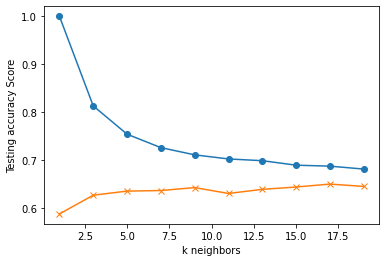

In [135]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [107]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12606239368598968, 'Ph'),
 (0.12379443173433252, 'Hardness'),
 (0.12250712820084009, 'Sulfate'),
 (0.11709819010786605, 'Chloramines'),
 (0.11371242070567644, 'Solids'),
 (0.10309764549980921, 'Conductivity'),
 (0.09961309044743402, 'Organic_carbon'),
 (0.09862479677498237, 'Trihalomethanes'),
 (0.09548990284306966, 'Turbidity')]